In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

df = pd.read_csv("seeds_dataset.csv")

In [78]:
x = df.drop(['y'], 1)
y = df['y']
for i,j in enumerate(y):
    y[i] = j - 1
print(y)
from sklearn.model_selection import train_test_split
x, x_test, y, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

x1 = x[:int(len(x)/2)]
x2 = x[int(len(x)/2):]

y1 = y[:int(len(y)/2)]
y2 = y[int(len(y)/2):]
print(y2)

0      0
1      0
2      0
3      0
4      0
      ..
205    2
206    2
207    2
208    2
209    2
Name: y, Length: 210, dtype: int64
13     0
155    2
23     0
78     1
100    1
      ..
67     0
192    2
117    1
47     0
172    2
Name: y, Length: 84, dtype: int64


C:\Users\Manish\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [82]:
def model_build() :
    model1 = tf.keras.models.Sequential()
    model1.add(tf.keras.layers.Dense(7, input_shape = (7,), activation='relu', use_bias = False))
    model1.add(tf.keras.layers.Dense(7, activation='relu', use_bias = False))
    model1.add(tf.keras.layers.Dense(3, activation='softmax'))
    model1.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model1

In [85]:
model1 = model_build()
model1.fit(x1, y1, epochs = 100)
model2 = model_build()
model2.fit(x2, y2, epochs = 100)
print(model1.evaluate(x_test, y_test))
print(model2.evaluate(x_test, y_test))

Train on 84 samples
Epoch 1/100
84/84 [==============================] - 0s 4ms/sample - loss: 1.0245 - acc: 0.3095
Epoch 2/100
84/84 [==============================] - 0s 119us/sample - loss: 1.0055 - acc: 0.3095
Epoch 3/100
84/84 [==============================] - 0s 135us/sample - loss: 0.9912 - acc: 0.3095
Epoch 4/100
84/84 [==============================] - 0s 127us/sample - loss: 0.9795 - acc: 0.3095
Epoch 5/100
84/84 [==============================] - 0s 108us/sample - loss: 0.9684 - acc: 0.3095
Epoch 6/100
84/84 [==============================] - 0s 131us/sample - loss: 0.9581 - acc: 0.3095
Epoch 7/100
84/84 [==============================] - 0s 145us/sample - loss: 0.9489 - acc: 0.3095
Epoch 8/100
84/84 [==============================] - 0s 198us/sample - loss: 0.9407 - acc: 0.3095
Epoch 9/100
84/84 [==============================] - 0s 122us/sample - loss: 0.9339 - acc: 0.3095
Epoch 10/100
84/84 [==============================] - 0s 141us/sample - loss: 0.9263 - acc: 0.3333
E

Epoch 83/100
84/84 [==============================] - 0s 135us/sample - loss: 0.6455 - acc: 0.7262
Epoch 84/100
84/84 [==============================] - 0s 163us/sample - loss: 0.6432 - acc: 0.7381
Epoch 85/100
84/84 [==============================] - 0s 170us/sample - loss: 0.6407 - acc: 0.7381
Epoch 86/100
84/84 [==============================] - 0s 201us/sample - loss: 0.6382 - acc: 0.7619
Epoch 87/100
84/84 [==============================] - 0s 91us/sample - loss: 0.6363 - acc: 0.7738
Epoch 88/100
84/84 [==============================] - 0s 179us/sample - loss: 0.6334 - acc: 0.7738
Epoch 89/100
84/84 [==============================] - 0s 137us/sample - loss: 0.6314 - acc: 0.7976
Epoch 90/100
84/84 [==============================] - 0s 142us/sample - loss: 0.6289 - acc: 0.7976
Epoch 91/100
84/84 [==============================] - 0s 147us/sample - loss: 0.6268 - acc: 0.7976
Epoch 92/100
84/84 [==============================] - 0s 137us/sample - loss: 0.6245 - acc: 0.7976
Epoch 93/10

84/84 [==============================] - 0s 262us/sample - loss: 0.8002 - acc: 0.6905
Epoch 66/100
84/84 [==============================] - 0s 188us/sample - loss: 0.7961 - acc: 0.6905
Epoch 67/100
84/84 [==============================] - 0s 116us/sample - loss: 0.7923 - acc: 0.6905
Epoch 68/100
84/84 [==============================] - 0s 302us/sample - loss: 0.7885 - acc: 0.7024
Epoch 69/100
84/84 [==============================] - 0s 171us/sample - loss: 0.7851 - acc: 0.6905
Epoch 70/100
84/84 [==============================] - 0s 139us/sample - loss: 0.7810 - acc: 0.6905
Epoch 71/100
84/84 [==============================] - 0s 144us/sample - loss: 0.7770 - acc: 0.7143
Epoch 72/100
84/84 [==============================] - 0s 178us/sample - loss: 0.7731 - acc: 0.7143
Epoch 73/100
84/84 [==============================] - 0s 214us/sample - loss: 0.7695 - acc: 0.7143
Epoch 74/100
84/84 [==============================] - 0s 186us/sample - loss: 0.7667 - acc: 0.7381
Epoch 75/100
84/84 [===

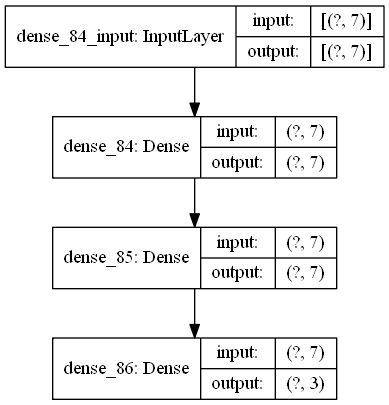

In [86]:
from tensorflow.keras.utils import plot_model
plot_model(model1,to_file='model1.png',show_shapes=True)

In [91]:
a1 = model1.get_weights()
print("-----------Model1 weights---------------------")
print(a1)
print()
a2 = model2.get_weights()
print("-----------Model2 weights---------------------")
print(a2)
print()
m = np.add(a1,a2)
print("-----------Add weights---------------------")
print(m)
m /= 2
print("-----------Final weights---------------------")
print(m)
model = model_build()
model.set_weights(m)
print(model.evaluate(x_test, y_test))

-----------Model1 weights---------------------
[array([[ 0.66275656, -0.5233547 , -0.646329  , -0.21468914, -0.07622039,
        -0.613642  , -0.6046951 ],
       [-0.47603682, -0.5823467 ,  0.43296552,  0.17794722, -0.0462507 ,
         0.4020952 ,  0.48177457],
       [-0.6850384 , -0.6058076 , -0.2769838 ,  0.61392343,  0.32417023,
         0.62863314, -0.28550103],
       [-0.4860496 ,  0.4982977 , -0.06032138, -0.41926935, -0.5452617 ,
        -0.49704123, -0.26882902],
       [ 0.660389  ,  0.6369082 ,  0.6439197 , -0.58728   , -0.39481965,
         0.22718257,  0.09402436],
       [ 0.7117123 , -0.32767677,  0.38183546,  0.01695418,  0.02339709,
         0.11780369, -0.37923473],
       [ 0.30278558,  0.4953295 ,  0.39200836, -0.00357288,  0.27477664,
        -0.13801467,  0.18545365]], dtype=float32), array([[-0.3991189 ,  0.38743052,  0.08923833, -0.3758292 , -0.21223694,
         0.14191575, -0.12524736],
       [ 0.12022543,  0.50186574,  0.353222  ,  0.18150872, -0.5426133 

42/42 [==============================] - 0s 7ms/sample - loss: 1.5963 - acc: 0.3095
[1.5963319937388103, 0.30952382]
